# ARIMA

AutoRegressive Integrated Moving Average.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

In [3]:
from utils import read_bars as read_bars_tmp

# Read bars in May 2020
def read_bars(csv_file: str)->pd.DataFrame:
    # TIME_BEGIN = pd.to_datetime('2020-05-01T00:00:00.000Z')
    # TIME_END = pd.to_datetime('2020-06-01T00:00:00.000Z')
    TIME_BEGIN = pd.to_datetime('2020-05-12T00:00:00.000Z')
    TIME_END = pd.to_datetime('2020-05-14T00:00:00.000Z')
    bars_df = read_bars_tmp(csv_file)
    bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp_end'] < TIME_END)]
    return bars_df

In [4]:
time_bars = read_bars('/data/bars/TimeBar/60000/TimeBar.60000.Binance.Swap.BTC_USDT.csv')

In [5]:
time_bars

,exchange,market_type,pair,bar_type,bar_size,timestamp,timestamp_end,open,high,low,...,volume,volume_sell,volume_buy,volume_quote,volume_quote_sell,volume_quote_buy,count,count_sell,count_buy,vwap
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-12 00:00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-12 00:00:00,2020-05-12 00:01:00,8560.730469,8561.879883,8540.769531,...,468.460,226.205,242.255,4005012.0,1933902.50,4004785.80,1060,506,554,8549.314776
2020-05-12 00:01:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-12 00:01:00,2020-05-12 00:02:00,8545.000000,8566.709961,8544.040039,...,321.819,223.273,98.546,2754213.0,1910834.60,2753989.80,904,610,294,8558.267225
2020-05-12 00:02:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-12 00:02:00,2020-05-12 00:03:00,8561.419922,8561.419922,8520.429688,...,519.416,187.146,332.270,4435116.0,1597941.40,4434929.00,1090,422,668,8538.658801
2020-05-12 00:03:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-12 00:03:00,2020-05-12 00:04:00,8534.389648,8548.549805,8534.059570,...,249.244,169.360,79.884,2129134.5,1446641.00,2128965.00,578,352,226,8542.370127
2020-05-12 00:04:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-12 00:04:00,2020-05-12 00:05:00,8543.940430,8570.969727,8542.769531,...,239.320,193.483,45.837,2048108.5,1655730.80,2047915.00,613,453,160,8558.033177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-13 23:54:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-13 23:54:00,2020-05-13 23:55:00,9298.000000,9302.209961,9297.490234,...,76.058,48.657,27.401,707271.4,452464.72,707222.75,209,128,81,9299.105945
2020-05-13 23:55:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-13 23:55:00,2020-05-13 23:56:00,9300.740234,9303.059570,9298.530273,...,74.680,23.799,50.881,694553.2,221346.73,694529.40,195,72,123,9300.391002
2020-05-13 23:56:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-13 23:56:00,2020-05-13 23:57:00,9299.509766,9299.799805,9286.160156,...,786.964,322.447,464.517,7312268.5,2996319.20,7311946.50,839,428,411,9291.744603


### 1.1 Plot price

In [6]:
prices = time_bars['vwap'].rename('price')

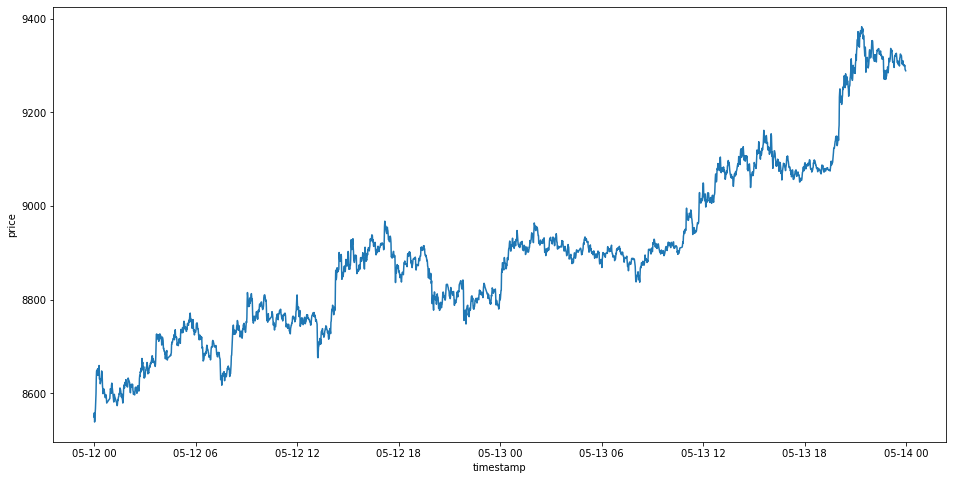

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=prices.index, y=prices, ax=ax)

There is a clear trend in the prices above, so the price time series is not stationary.

### 1.2 ADF test

In [8]:
adf_result = ADF(prices)

In [9]:
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Used lag: %f' % adf_result[2])
print('Number of observations: %f' % adf_result[3])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.850589
p-value: 0.803809
Used lag: 5.000000
Number of observations: 2798.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In the output above, we can see that ADF statistic value of `-0.850589` is greater than the value of `-3.433` at 1%. Besides, the p-value `0.803809` is greater than `0.05`. Both values support the null hypothesis, therefore price time series is not stationary.

## 2. Estimate `p` and `q` by plotting ACF and PACF

Usually we use partial autocorrelation to estimate the order `p` of `AR(p)` model and use autocorrelation to estimate the order `q` of `MA(q)` model, so let's first plot ACF and PACF.

Rules to identify the orders of AR or MA:

* The lag beyond which the PACF cuts off is the indicated order of AR.
* The lag beyond which the ACF cuts off is the indicated order of MA.

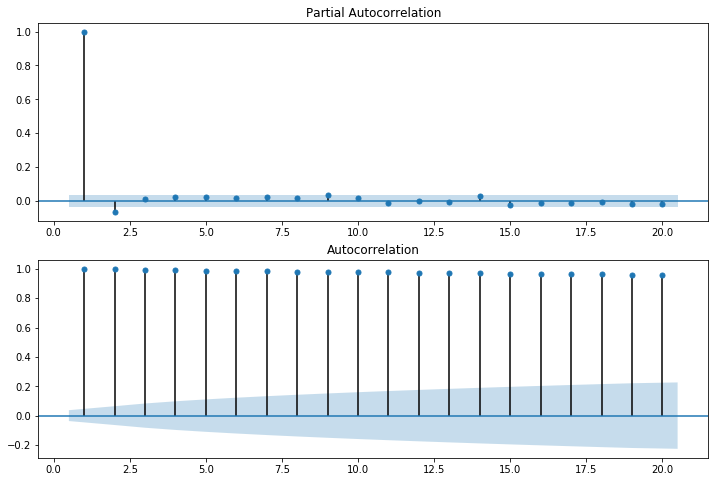

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(prices, lags=20, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(prices.values.squeeze(), lags=20, zero=False, ax=ax2)

* The PACF shuts off after lag 2.
* The ACF shows significant autocorrelations even after lag 20.

So we can tentatively set `p=2` and `q=10`.

## 3. Train the model

In [11]:
# ValueWarning: A date index has been provided, but it has no associated frequency information
prices.index = pd.DatetimeIndex(prices.index).to_period('T')

In [12]:
# ar1_model = sm.tsa.arima.ARIMA(price_diffs, order=(1, 0, 0)).fit() # AR1
# ma1_model = sm.tsa.arima.ARIMA(price_diffs, order=(0, 0, 1)).fit() # MA1
arima_model = sm.tsa.arima.ARIMA(prices, order=(2, 1, 10)).fit()  # ARIMA(2,1,10)

In [13]:
# arma_model.summary()

In [14]:
print(arima_model.aic, arima_model.bic, arima_model.hqic)

19307.58013329283 19384.779925457973 19335.44478781652


In [15]:
print(arima_model.params)

ar.L1      0.577209
ar.L2     -0.933407
ma.L1     -0.416978
ma.L2      0.788670
ma.L3      0.108518
ma.L4     -0.024620
ma.L5     -0.094991
ma.L6     -0.012566
ma.L7     -0.040853
ma.L8     -0.005999
ma.L9     -0.039929
ma.L10     0.016603
sigma2    55.522703
dtype: float64


## 4. How does our model fit the data?

Let's do a white noise test on the residuals time series data. If the residuals are white noise, which means all information have been extracted sufficiently by the model.

### 4.1 Are there any autocorrelations in residuals?

In [16]:
sm.stats.durbin_watson(arima_model.resid.values)

1.0001026685404735

The Durbin–Watson statistic is less than 2, which is evidence of positive serial correlation.

### 4.2 Plot ACF and PACF of residuals

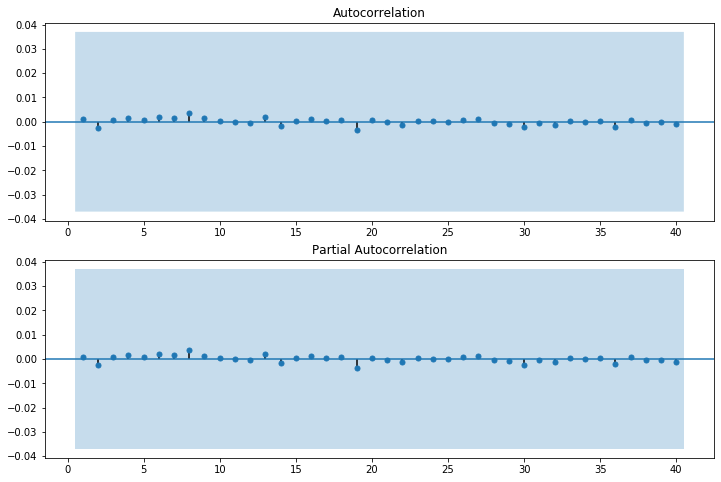

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_model.resid.values.squeeze(), lags=40, zero=False, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_model.resid, lags=40, zero=False, ax=ax2)

The two figures above show that there are no autocorrelations at all lags, which means residuals are almost white noise, the model has extracted information sufficiently.

### 4.3 Ljung-Box test

In [18]:
sm.stats.acorr_ljungbox(arima_model.resid.values, lags=1, return_df=True)

,lb_stat,lb_pvalue
1,0.002813,0.957699


The p-value of Ljung-Box test is much greater than 0.05, which indicates that residuals are white noise.

**Conclusion: The residuals are white noise, which means our model fits the data quite well.**

## 5. Plot predicted values

In [19]:
predicted_prices = arima_model.predict(
    start=1,
    end=prices.shape[0],
    dynamic=False,
)

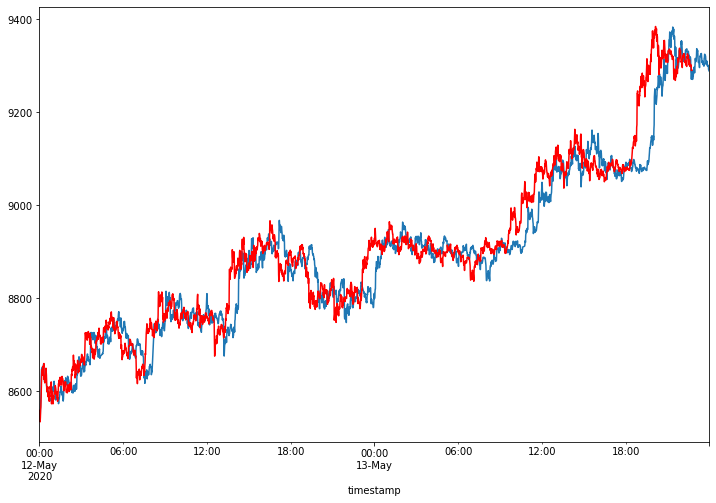

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
prices.plot(ax=ax)
predicted_prices.plot(ax=ax, style='r')

## Lessions Learnt

* <font color='red'>AR, MA, ARMA and ARIMA require time series data to have a constant time interval.</font> Only time bar can be used, tick bar, volume bar and dollar bar have no constant time intervals.

## References

* [Everything you can do with a time series | Kaggle](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
* [Time Series Forecast Case Study with Python: Monthly Armed Robberies in Boston](https://machinelearningmastery.com/time-series-forecast-case-study-python-monthly-armed-robberies-boston/)
* [How does ACF & PACF identify the order of MA and AR terms? - Cross Validated](https://stats.stackexchange.com/q/281666/21732)
* [Rules for identifying ARIMA models](https://people.duke.edu/~rnau/arimrule.htm)
* [Identifying the numbers of AR or MA terms in an ARIMA model](https://people.duke.edu/~rnau/411arim3.htm)
* [forecasting - I'm not sure that statsmodels is predicting out-of-sample - Cross Validated](https://stats.stackexchange.com/q/76160/21732)
* [statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)
* [How to Create an ARIMA Model for Time Series Forecasting in Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
* [How to Tune ARIMA Parameters in Python](https://machinelearningmastery.com/tune-arima-parameters-python/)
* [How to Make Out-of-Sample Forecasts with ARIMA in Python](https://machinelearningmastery.com/make-sample-forecasts-arima-python/)
* [Advanced Time Series Analysis with ARMA and ARIMA - Towards Data Science](https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d)